In [2]:
#CONDA ENV: base
#Import packages
#---------------------------------------
import sys
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pysam as sam

#Import your modules
#---------------------------------------
sys.path.insert(1, '/cndd3/dburrows/CODE/admin_tools/')
from admin_tools import admin_functions as adm

# Define paths
#----------------------------------------------------------------------
l_code = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
l_data = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
l_fig = '/Users/dominicburrows/Dropbox/PhD/figures/'

s_code = '/cndd3/dburrows/CODE/'
s_data = '/cndd3/dburrows/DATA/'
s_fig = '/cndd3/dburrows/FIGS/'

%load_ext autoreload
sys.version

'3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:23:11) \n[GCC 9.4.0]'

# Load data

In [2]:
#Load in txt with tab separation file with pandas 
df = pd.read_csv('//datasets/Public_Datasets/Dracheva_PsychEncode_development/processed/rna_seq/allSamples_rsem_genes_results_mod.txt', sep='\t', header=0, index_col=0)

In [5]:
df

,1105-GABA,1105-GLU,1133-GABA,1133-GLU,1134-GABA,1134-GLU,1275-GABA,1275-GLU,1277-GABA,1277-GLU,...,Hct15HBNA032-GABA,Hct15HBNA032-GLU,Hct16HCQA020-GABA,Hct16HCQA020-GLU,Hct17HEIA010-GABA,Hct17HEIA010-GLU,HctYPA008-GABA,HctYPA008-GLU,HctZZNA014-GABA,HctZZNA014-GLU
ENSG00000000003.15,1,0,2,0,1,2,1,0,0,0,...,0,3,1,0,2,0,0,0,0,0
ENSG00000000005.6,0,0,0,0,0,0,0,0,0,2,...,1,0,6,0,2,1,0,0,0,0
ENSG00000000419.13,12,3,5,6,9,6,6,5,5,4,...,0,3,12,12,6,1,1,2,10,6
ENSG00000000457.14,60,30,122,55,158,70,63,35,55,54,...,14,15,30,26,45,53,22,38,44,37
ENSG00000000460.17,149,166,179,164,223,203,191,355,143,100,...,125,117,217,180,228,195,170,163,149,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288695.1,9,3,8,12,10,7,3,4,4,0,...,0,0,0,6,4,7,0,0,12,0
ENSG00000288696.1,0,0,0,0,1,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
ENSG00000288697.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000288698.1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
#load in metadata
meta = pd.read_csv('//cndd3/dburrows/DATA/te/metadata/PE/PEC_RNAmeta.csv')
INF = meta[meta['period'] == 'adolescence'] # <1 infancy
ECH = meta[meta['period'] == 'earlychildhood'] # 1-5 early childhood
LCH = meta[meta['period'] == 'latechildhood'] #5-12 late childhood
ADO = meta[meta['period'] == 'adolescence'] #12-20 adolescence
ADU = meta[meta['period'] == 'adulthood'] #20-50 adulthood
LADU = meta[meta['period'] == 'lateadulthood'] #50-80 late adulthood
#make age groups
#meta['age_group'] = meta['AGEYEARS'].apply(lambda x: 'infancy' if x < INF else ('early childhood' if x < ECH else ('late childhood' if x < LCH else ('adolescence' if x < ADO else ('adulthood' if x < ADU else ('late adulthood'))))))

# Age vs total transcription

In [52]:
#Plot total counts as a function of time by cell type
meta_gaba = meta[meta['Cell Type'] == 'GABA']
meta_glu = meta[meta['Cell Type'] == 'GLU']
gaba_tup = group_count_age(df, meta_gaba)
glu_tup = group_count_age(df, meta_glu)

def group_count_age(count_df, meta_df):
    count_v = [np.sum(count_df[i].values) for i in meta_df['sample'].values]
    age_v = meta_df['AGEYEARS'].values
    return(count_v, age_v)

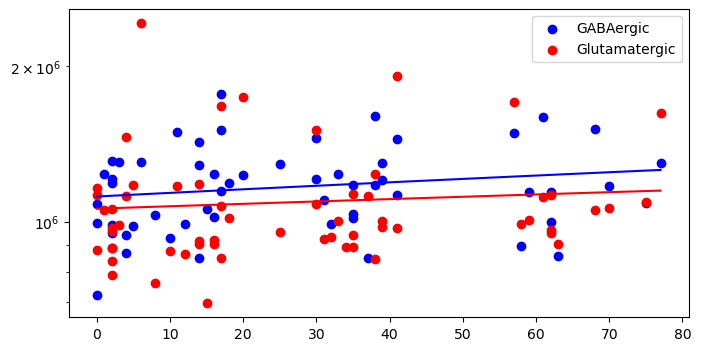

In [58]:
fig,ax = plt.subplots(figsize=(8,4))
plt.scatter(gaba_tup[1], gaba_tup[0], color='blue', label='GABAergic')
plt.scatter(glu_tup[1], glu_tup[0], color='red', label='Glutamatergic')
#plot line of best fit 
plt.plot(np.unique(gaba_tup[1]), np.poly1d(np.polyfit(gaba_tup[1], gaba_tup[0], 1))(np.unique(gaba_tup[1])), color='blue')
plt.plot(np.unique(glu_tup[1]), np.poly1d(np.polyfit(glu_tup[1], glu_tup[0], 1))(np.unique(glu_tup[1])), color='red')
plt.yscale('log')
plt.legend()
plt.show()

In [62]:
#spearmans correlation
from scipy.stats import spearmanr
corr, p_value = spearmanr(gaba_tup[0], gaba_tup[1])
print(corr, p_value)
corr, p_value = spearmanr(glu_tup[0], glu_tup[1])
print(corr, p_value)

0.21228153552588908 0.11289575561356781
0.17148546579926952 0.19405854536380138


In [164]:
def group_plot(curr, a, b):
    fig, axarr = plt.subplots(figsize = (7,5))

    names = curr['sample'].values
    for n in names:
        #make logarithmic bins
        data = df[n][df[n].values >0].values
        cpm_data=(data/np.sum(data))*1e6
        filt_data = cpm_data[cpm_data > 100]
        hist = np.histogram(filt_data, bins = b)
        xaxis = hist[1][:-1]
        axarr.plot(xaxis[:len(xaxis)-1], hist[0][:len(xaxis)-1], '-', linewidth = 4, markersize = 1, alpha = 1)
        #plt.hist(data, alpha=a, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)), b))

    plt.xscale('log')
    plt.yscale('log')
    plt.show()

In [ ]:
data = df[n][df[n].values !=0].values
cpm_data=(data/np.sum(data))*1e6

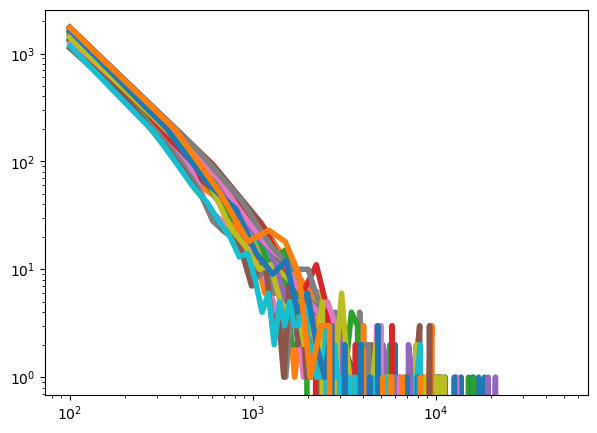

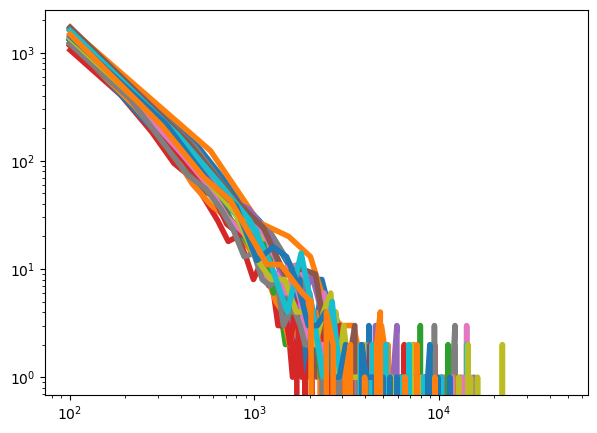

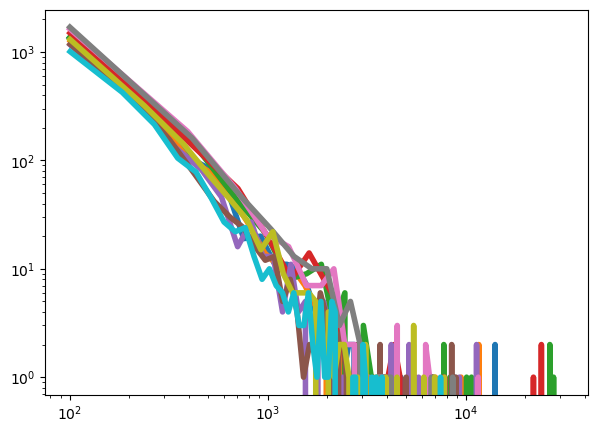

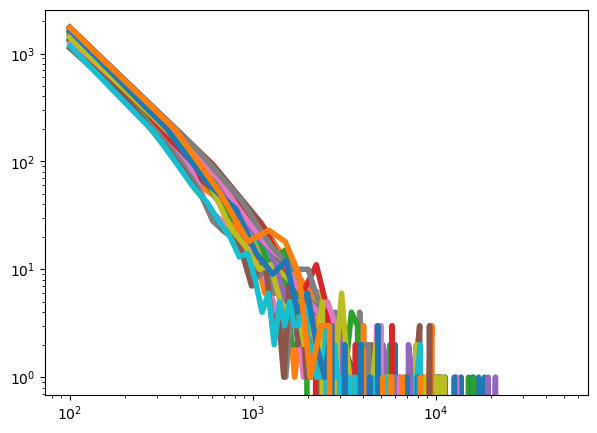

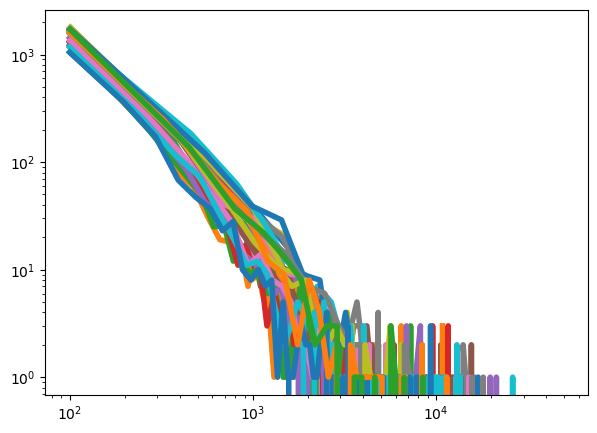

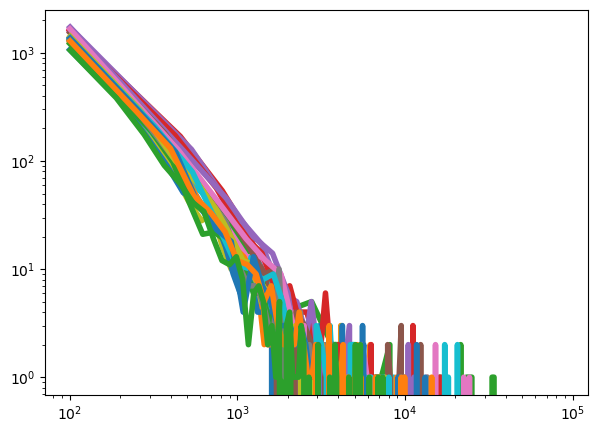

In [165]:
group_plot(INF, 0.1, 100)
group_plot(ECH, 0.1, 100)
group_plot(LCH, 0.1, 100)
group_plot(ADO, 0.1, 100)
group_plot(ADU, 0.1, 100)
group_plot(LADU, 0.1, 100)

In [117]:
cc.__getitem__

<bound method Cycler.__getitem__ of cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])>

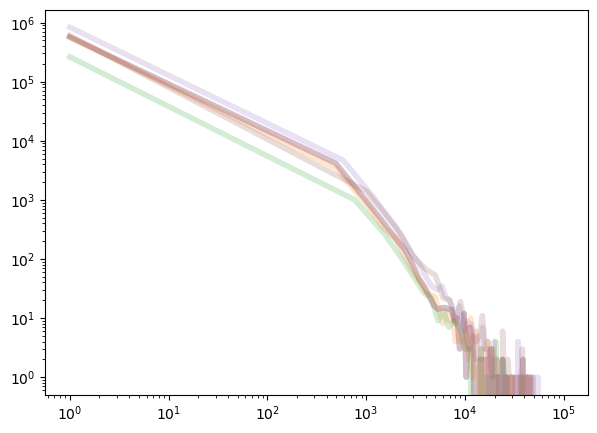

In [167]:

fig, axarr = plt.subplots(figsize = (7,5))
group_l = [INF, ECH, LCH, ADO, ADU, LADU]
#import cycler
from cycler import cycler
#make color cycler with 6 colors
cc =['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for x,curr in enumerate(group_l):
    names = curr['sample'].values
    full_data=[]
    for n in names:
        #make logarithmic bins
        data = df[n][df[n].values !=0].values
        full_data = np.append(full_data,data)
    hist = np.histogram(full_data, bins = 100)
    xaxis = hist[1][:-1]
    axarr.plot(xaxis[:len(xaxis)-1], hist[0][:len(xaxis)-1], '-', linewidth = 4, markersize = 1, alpha = 0.2, c=cc[x])
        #plt.hist(data, alpha=a, bins=np.logspace(np.log10(np.min(data)),np.log10(np.max(data)), b))

plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
#Correlation with age -> Mean across all genes
#Find way to get sig test?

# Age vs RNA error rate

In [67]:
# Low RPB9 + DST1 expression expected with high RNA polymerase error rate
import mygene
short_nom = [df.index.values[i].split('.')[0] for i in range(len(df.index.values))]
prac = mg.querymany(short_nom, scopes='ensembl.gene', returnall=True)

Note: you may need to restart the kernel to use updated packages.


In [134]:
count=0
for i in prac['out']:
    if 'symbol' in i.keys():
        if i['symbol'] == 'POLR2I' or i['symbol'] == 'DST1':
            print(i)

{'query': 'ENSG00000105258', '_id': '5438', '_score': 24.130703, 'entrezgene': '5438', 'name': 'RNA polymerase II subunit I', 'symbol': 'POLR2I', 'taxid': 9606}


In [163]:
query = 'ENSG00000105258'
ind = np.where(np.asarray(short_nom) == query)[0][0]
curr_df = df.iloc[ind]


In [193]:
def group_count_age(count_df, meta_df):
    cpm_df = (count_df/np.sum(count_df,axis=0))*1e6
    cpm_v = [cpm_df[i] for i in meta_df['sample'].values]
    age_v = meta_df['AGEYEARS'].values
    return(cpm_v, age_v)
    
#Plot CPM as a function of time by cell type
meta_gaba = meta[meta['Cell Type'] == 'GABA']
meta_glu = meta[meta['Cell Type'] == 'GLU']
gaba_tup = group_count_age(curr_df, meta_gaba)
glu_tup = group_count_age(curr_df, meta_glu)



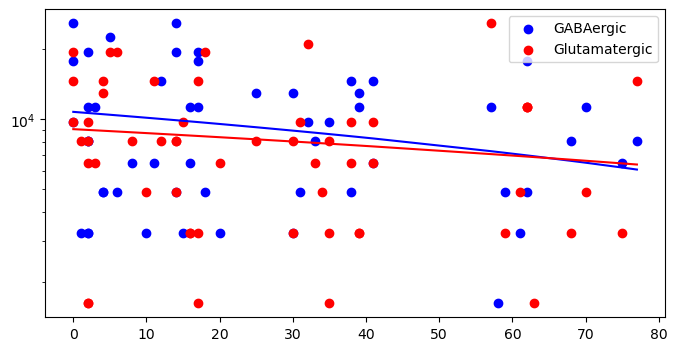

In [197]:
fig,ax = plt.subplots(figsize=(8,4))
plt.scatter(gaba_tup[1], gaba_tup[0], color='blue', label='GABAergic')
plt.scatter(glu_tup[1], glu_tup[0], color='red', label='Glutamatergic')
#plot line of best fit 
plt.plot(np.unique(gaba_tup[1]), np.poly1d(np.polyfit(gaba_tup[1], gaba_tup[0], 1))(np.unique(gaba_tup[1])), color='blue')
plt.plot(np.unique(glu_tup[1]), np.poly1d(np.polyfit(glu_tup[1], glu_tup[0], 1))(np.unique(glu_tup[1])), color='red')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
#spearmans correlation
from scipy.stats import spearmanr
corr, p_value = spearmanr(gaba_tup[0], gaba_tup[1])
print(corr, p_value)
corr, p_value = spearmanr(glu_tup[0], glu_tup[1])
print(corr, p_value)

-0.15111934889060613 0.2618164556012556
-0.18513508567866732 0.16038088989520738


# RNA variability with age

In [4]:
#group by celltype
meta_gaba = meta[meta['Cell Type'] == 'GABA']
meta_glu = meta[meta['Cell Type'] == 'GLU']

In [34]:
#Convert to CPM
cpm_df = (df/np.sum(df,axis=0))*1e6

#Filter genes based on minimum expression level
#Remove any genes not expressed in at least 10% of samples
filt_df = cpm_df.loc[np.sum(cpm_df > 0,axis=1) > 0.1*cpm_df.shape[1]]

#Retain the top 50% most variable genes
#filt_df = filt_df[np.var(filt_df, axis=1) > np.percentile(np.var(filt_df, axis=1).values, 80)]
filt_df.shape

(35945, 116)

In [321]:
#find the top n PCs of gene data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
X_sc = scaler.fit_transform(filt_df.T)

#find the top n PCs of gene data
pca = PCA(n_components=116)
pca.fit(X_sc)

var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

62


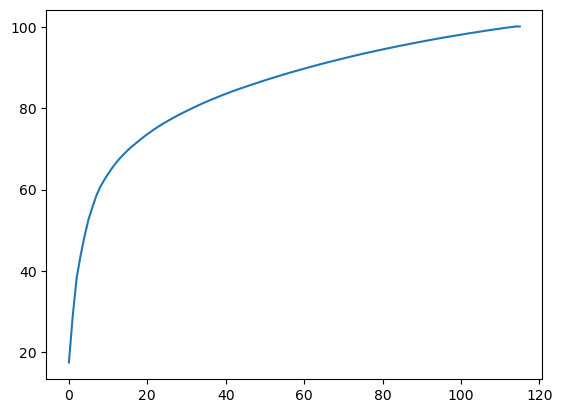

In [322]:
minpc = np.where(var1 > 90)[0][0]
print(minpc)
plt.plot(var1)
plt.show()

In [331]:
#Do PCA
scaler = StandardScaler(with_mean=True, with_std=True)
X_sc = scaler.fit_transform(filt_df.T)

#find the top n PCs of gene data
pca = PCA(n_components=5)
pca.fit(X_sc)
X_pc = pca.transform(X_sc).T
#make into dict
pc_dict = {}
for i in range(len(X_pc)):
    pc_dict["PC"+str(i+1)] = X_pc[i]
#add df column names to pc_dict
pc_df = pd.DataFrame(pc_dict, index=filt_df.columns).T
pc_df


,1105-GABA,1105-GLU,1133-GABA,1133-GLU,1134-GABA,1134-GLU,1275-GABA,1275-GLU,1277-GABA,1277-GLU,...,Hct15HBNA032-GABA,Hct15HBNA032-GLU,Hct16HCQA020-GABA,Hct16HCQA020-GLU,Hct17HEIA010-GABA,Hct17HEIA010-GLU,HctYPA008-GABA,HctYPA008-GLU,HctZZNA014-GABA,HctZZNA014-GLU
PC1,-42.400720,39.769198,-43.019094,30.310829,-42.492884,35.466354,-38.190761,27.372830,-40.382307,38.585117,...,-38.488229,15.629946,-29.136936,23.424922,-21.788579,23.085925,-40.298365,27.825871,-36.439231,36.590236
PC2,21.177266,23.562531,18.484441,12.443830,32.869765,30.436602,16.445152,-1.837089,25.293636,10.541256,...,-57.450086,-60.106426,-2.012765,-29.021052,19.423353,20.489297,-27.488250,-26.480821,-22.203947,-20.830925
PC3,1.628939,-4.041308,-1.982753,-3.126440,-54.863900,-32.043430,-11.937999,-32.559190,-20.094808,-25.231777,...,62.760818,66.989855,49.708992,68.967875,-6.623051,-2.651250,28.853518,17.555871,-0.683859,3.253452
PC4,10.587463,13.568190,-14.160959,-7.475406,-7.372929,0.576127,-3.515713,36.189732,13.280023,18.737067,...,7.832790,8.250980,-21.686335,-32.209811,-25.504040,-30.518597,-3.738495,-0.227944,-1.375157,0.446766
PC5,-19.019360,-16.735751,-11.539333,-16.800555,2.322821,-13.078360,1.951266,61.044228,-6.912379,-18.047325,...,-0.563081,-4.757886,21.007056,28.440695,24.011378,26.570323,1.160716,3.691364,0.939455,-6.313378


In [332]:
#find intersect of sample IDs
inters = np.intersect1d(meta_gaba['Sample ID'].unique(), meta_glu['Sample ID'].unique())
#compute age
[meta_gaba[meta_gaba['Sample ID'] == i]['AGEYEARS'].values[0] for i in inters] == [meta_glu[meta_glu['Sample ID'] == i]['AGEYEARS'].values[0] for i in inters]
age_ = np.asarray([meta_gaba[meta_gaba['Sample ID'] == i]['AGEYEARS'].values[0] for i in inters])
inters, age_

(array(['1105', '1133', '1134', '1241', '1275', '1277', '1539', '1648',
        '179134-1401', '1823', '1848', '198034-1435', '198035-1765',
        '4321', '4332', '4337', '4369', '4379', '4411', '4414', '4425',
        '4428', '4545', '4725', '5077', '5086', '5161', '5184', '5293',
        '5309', '5326', '5387', '5401', '5446', '5451', '5570', '5606',
        '5617', '5643', '5744', '5787', '5871', '5918', '5936', '5976',
        '5977', '6007', '6032', '6285', 'Hct15HAWA031', 'Hct15HBMA007',
        'Hct15HBNA032', 'Hct16HCQA020', 'Hct16HECA028', 'Hct17HEIA010',
        'HctYPA008', 'HctZZNA014'], dtype=object),
 array([16, 38, 41, 39,  2, 35, 33, 38, 61, 15, 58, 62, 20,  2,  5,  8,  2,
         2,  0,  0,  1,  0, 31, 32, 16, 63, 10, 17, 41, 14, 62, 12, 18, 17,
        57, 37, 35, 59, 17, 77, 68,  2, 30, 14,  4,  6, 14,  4, 11, 25, 70,
        35,  2, 30,  3, 75, 39]))

In [333]:
#compute euclidean distance
diff_v = []
for i in inters:
    point1 = pc_df[i + '-GABA'].values
    point2 = pc_df[i + '-GLU'].values
    diff_v.append(np.linalg.norm(point1 - point2))

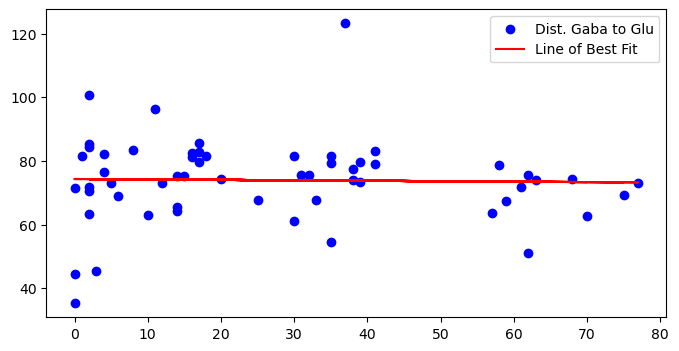

In [334]:
fig,ax = plt.subplots(figsize=(8,4))
plt.scatter(age_, diff_v,color='blue', label='Dist. Gaba to Glu')
#plot line of best fit
m,b = np.polyfit(age_, diff_v, 1)
plt.plot(age_, m*age_ + b, color='red', label='Line of Best Fit')
#plt.yscale('log')
plt.legend()
plt.show()

In [335]:
#spearmans correlation
from scipy.stats import spearmanr
corr, p_value = spearmanr(age_, diff_v)
print(corr, p_value)


-0.05015086398579225 0.7110281688735048


In [59]:
#Convert to CPM
cpm_df = (df/np.sum(df,axis=0))*1e6

#Filter genes based on minimum expression level
#Remove any genes not expressed in at least 10% of samples
filt_df = cpm_df.loc[np.sum(cpm_df > 0,axis=1) > 0.99*cpm_df.shape[1]]

#Retain the top 50% most variable genes
filt_df = filt_df[np.var(filt_df, axis=1) > np.percentile(np.var(filt_df, axis=1).values, 99)]
filt_df.shape

(113, 116)

In [61]:
# Calculate the variance in gene expression with age
def group_count_age(count_df, meta_df):
    cpm_v = [np.std(count_df[i].values) for i in meta_df['sample'].values]
    age_v = meta_df['AGEYEARS'].values
    return(cpm_v, age_v)
    
#Plot CPM as a function of time by cell type
meta_gaba = meta[meta['Cell Type'] == 'GABA']
meta_glu = meta[meta['Cell Type'] == 'GLU']
gaba_tup = group_count_age(filt_df, meta_gaba)
glu_tup = group_count_age(filt_df, meta_glu)
filt_df.shape


(113, 116)

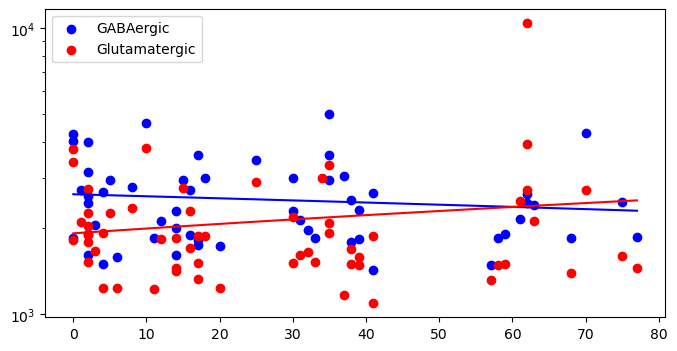

In [62]:
fig,ax = plt.subplots(figsize=(8,4))
plt.scatter(gaba_tup[1], gaba_tup[0], color='blue', label='GABAergic')
plt.scatter(glu_tup[1], glu_tup[0], color='red', label='Glutamatergic')
#plot line of best fit 
plt.plot(np.unique(gaba_tup[1]), np.poly1d(np.polyfit(gaba_tup[1], gaba_tup[0], 1))(np.unique(gaba_tup[1])), color='blue')
plt.plot(np.unique(glu_tup[1]), np.poly1d(np.polyfit(glu_tup[1], glu_tup[0], 1))(np.unique(glu_tup[1])), color='red')
plt.yscale('log')
plt.legend()
plt.show()

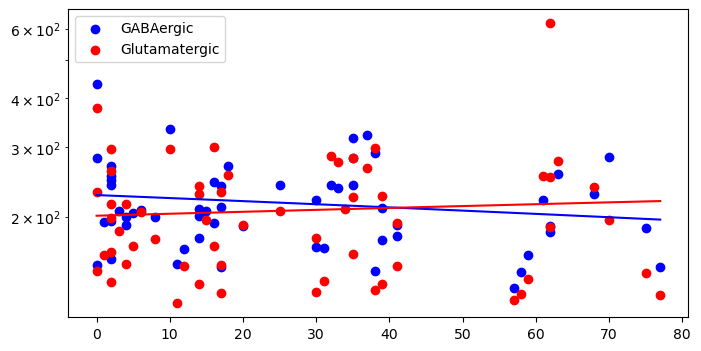

In [52]:
fig,ax = plt.subplots(figsize=(8,4))
plt.scatter(gaba_tup[1], gaba_tup[0], color='blue', label='GABAergic')
plt.scatter(glu_tup[1], glu_tup[0], color='red', label='Glutamatergic')
#plot line of best fit 
plt.plot(np.unique(gaba_tup[1]), np.poly1d(np.polyfit(gaba_tup[1], gaba_tup[0], 1))(np.unique(gaba_tup[1])), color='blue')
plt.plot(np.unique(glu_tup[1]), np.poly1d(np.polyfit(glu_tup[1], glu_tup[0], 1))(np.unique(glu_tup[1])), color='red')
plt.yscale('log')
plt.legend()
plt.show()

# Mutational burden with age

In [21]:
# load in data
df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/RNA-mut/metadata/base_mismatch_stats.csv', index_col=0)
df

,5401-GLU,198034-1435-GABA,1105-GABA,4414-GLU,1134-GABA,1105-GLU,4545-GLU,5606-GABA,4321-GABA,1275-GABA,...,5643-GABA,4321-GLU,5077-GABA,6285-GLU,3739-GLU,4425-GLU,1134-GLU,Hct15HAWA031-GABA,5086-GABA,1133-GLU
0,2.700082,2.746593,2.951380,3.016078,2.349033,2.926779,2.59386,2.153137,2.377454,2.37713,...,2.728714,2.407511,2.717263,2.354799,3.076933,2.588379,2.528879,2.790161,2.463092,2.566583
1,2.000000,2.020202,2.020202,2.061856,2.000000,2.020202,2.00000,2.000000,2.000000,2.00000,...,2.020202,2.000000,2.000000,2.000000,2.061856,2.000000,2.000000,2.020202,2.000000,2.000000


In [107]:
#Calculate percent of mismatches per read
import pysam as sam
path = '/cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1105-GABA/Aligned.sortedByCoord.out.bam'
data = sam.AlignmentFile(path, 'rb')

mm_v = []
cig_list = []
for x,read in enumerate(data):
    mm_v.append((1-sum(np.asarray(read.cigartuples)[:,1][np.asarray(read.cigartuples)[:,0] == 0]) / read.infer_read_length()) * 100)

#save mm_v as npy file
np.save(mm_v, mm_v)

In [26]:
#load in mut data, take median of each sample and put into df
inp_path = '/cndd/dburrows/DATA/te/rna/PE.counts/RNA-mut/'
df = pd.DataFrame()
curr_l = glob.glob(inp_path + '*Samp*')
for x,c in enumerate(curr_l):
    if x % int(len(curr_l)/10) == 0:
        print(x/len(curr_l) * 100, '%')
    data = np.load(c + '/base_mismatch_perc.npy')
    mean = np.mean(data)
    median = np.median(data)
    df[os.path.basename(c).split('_')[1]] = [mean, median]
#save df
df.to_csv('/cndd/dburrows/DATA/te/rna/PE.counts/RNA-mut/metadata/base_mismatch_stats.csv')

0.0 %
9.482758620689655 %
18.96551724137931 %
28.448275862068968 %
37.93103448275862 %
47.41379310344828 %
56.896551724137936 %
66.37931034482759 %
75.86206896551724 %
85.34482758620689 %


/tmp/ipykernel_2212563/3613093578.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[os.path.basename(c).split('_')[1]] = [mean, median]
/tmp/ipykernel_2212563/3613093578.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[os.path.basename(c).split('_')[1]] = [mean, median]
/tmp/ipykernel_2212563/3613093578.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

94.82758620689656 %


/tmp/ipykernel_2212563/3613093578.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[os.path.basename(c).split('_')[1]] = [mean, median]
/tmp/ipykernel_2212563/3613093578.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[os.path.basename(c).split('_')[1]] = [mean, median]
/tmp/ipykernel_2212563/3613093578.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

In [31]:
#Plot as a function of age, by cell type
def group_count_age(count_df, meta_df):
    mean_v = [count_df[i][0] for i in meta_df['sample'].values]
    median_v = [count_df[i][1] for i in meta_df['sample'].values]
    age_v = meta_df['AGEYEARS'].values
    return(mean_v, median_v, age_v)

meta_gaba = meta[meta['Cell Type'] == 'GABA']
meta_glu = meta[meta['Cell Type'] == 'GLU']
gaba_tup = group_count_age(df, meta_gaba)
glu_tup = group_count_age(df, meta_glu)



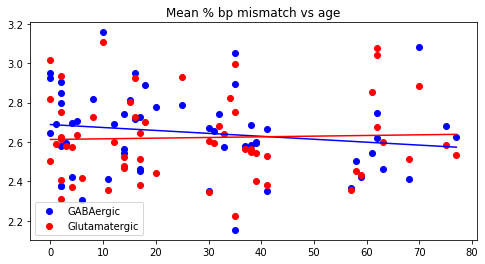

In [36]:
fig,ax = plt.subplots(figsize=(8,4))
plt.title('Mean % bp mismatch vs age')
plt.scatter(gaba_tup[2], gaba_tup[0], color='blue', label='GABAergic')
plt.scatter(glu_tup[2], glu_tup[0], color='red', label='Glutamatergic')
#plot line of best fit 
plt.plot(np.unique(gaba_tup[2]), np.poly1d(np.polyfit(gaba_tup[2], gaba_tup[0], 1))(np.unique(gaba_tup[2])), color='blue')
plt.plot(np.unique(glu_tup[2]), np.poly1d(np.polyfit(glu_tup[2], glu_tup[0], 1))(np.unique(glu_tup[2])), color='red')
#plt.yscale('log')
plt.legend()
plt.show()

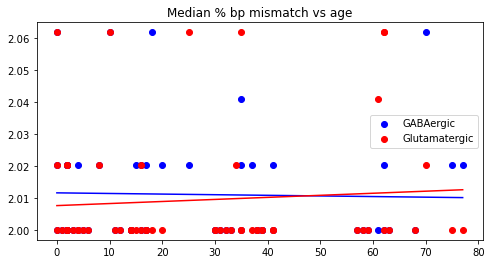

In [37]:
fig,ax = plt.subplots(figsize=(8,4))
plt.title('Median % bp mismatch vs age')
plt.scatter(gaba_tup[2], gaba_tup[1], color='blue', label='GABAergic')
plt.scatter(glu_tup[2], glu_tup[1], color='red', label='Glutamatergic')
#plot line of best fit 
plt.plot(np.unique(gaba_tup[2]), np.poly1d(np.polyfit(gaba_tup[2], gaba_tup[1], 1))(np.unique(gaba_tup[2])), color='blue')
plt.plot(np.unique(glu_tup[2]), np.poly1d(np.polyfit(glu_tup[2], glu_tup[1], 1))(np.unique(glu_tup[2])), color='red')
#plt.yscale('log')
plt.legend()
plt.show()

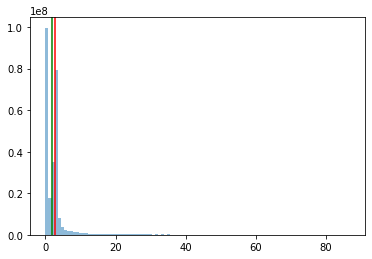

In [30]:
plt.hist(curr_v, bins = 100, alpha = 0.5, label = 'curr_v')
#plot mean and median
plt.axvline(np.mean(curr_v), color = 'red', label = 'mean')
plt.axvline(np.median(curr_v), color = 'green', label = 'median')
plt.show()

# Transcription rate